### USC ID  : 8534717045
### NAME   : SRINATH BEGUDEM
### GITHUB: SrinathBegudem


### Vertebral Column Data Set
* This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.


In [1]:
#Importing requried libraries for the assignment 1 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')



####  1(a)Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [2]:
df = pd.read_csv(r"..\..\data\vertebral_column_data\column_2C.dat", sep=' ')

#changed the column names according to given description in the question
new_columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']
df.columns = new_columns

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,AB
1,68.83,22.22,50.09,46.61,105.99,-3.53,AB
2,69.30,24.65,44.31,44.64,101.87,11.21,AB
3,49.71,9.65,28.32,40.06,108.17,7.92,AB
4,40.25,13.92,25.12,26.33,130.33,2.23,AB


In [4]:
# binary classification task NO=0 and AB=1

df.replace("AB", 1, inplace=True)
df.replace("NO", 0, inplace=True)

# inplace true keyword updates the existing data instead of creating new data and assigning it to a new variable.
df


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,39.06,10.06,25.02,29.00,114.41,4.56,1
1,68.83,22.22,50.09,46.61,105.99,-3.53,1
2,69.30,24.65,44.31,44.64,101.87,11.21,1
3,49.71,9.65,28.32,40.06,108.17,7.92,1
4,40.25,13.92,25.12,26.33,130.33,2.23,1
...,...,...,...,...,...,...,...
304,47.90,13.62,36.00,34.29,117.45,-4.25,0
305,53.94,20.72,29.22,33.22,114.37,-0.42,0
306,61.45,22.69,46.17,38.75,125.67,-2.71,0
307,45.25,8.69,41.58,36.56,118.55,0.21,0


### (b)Pre-Processing and Exploratory data analysis:

* i) Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
* ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).
* iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

####  scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

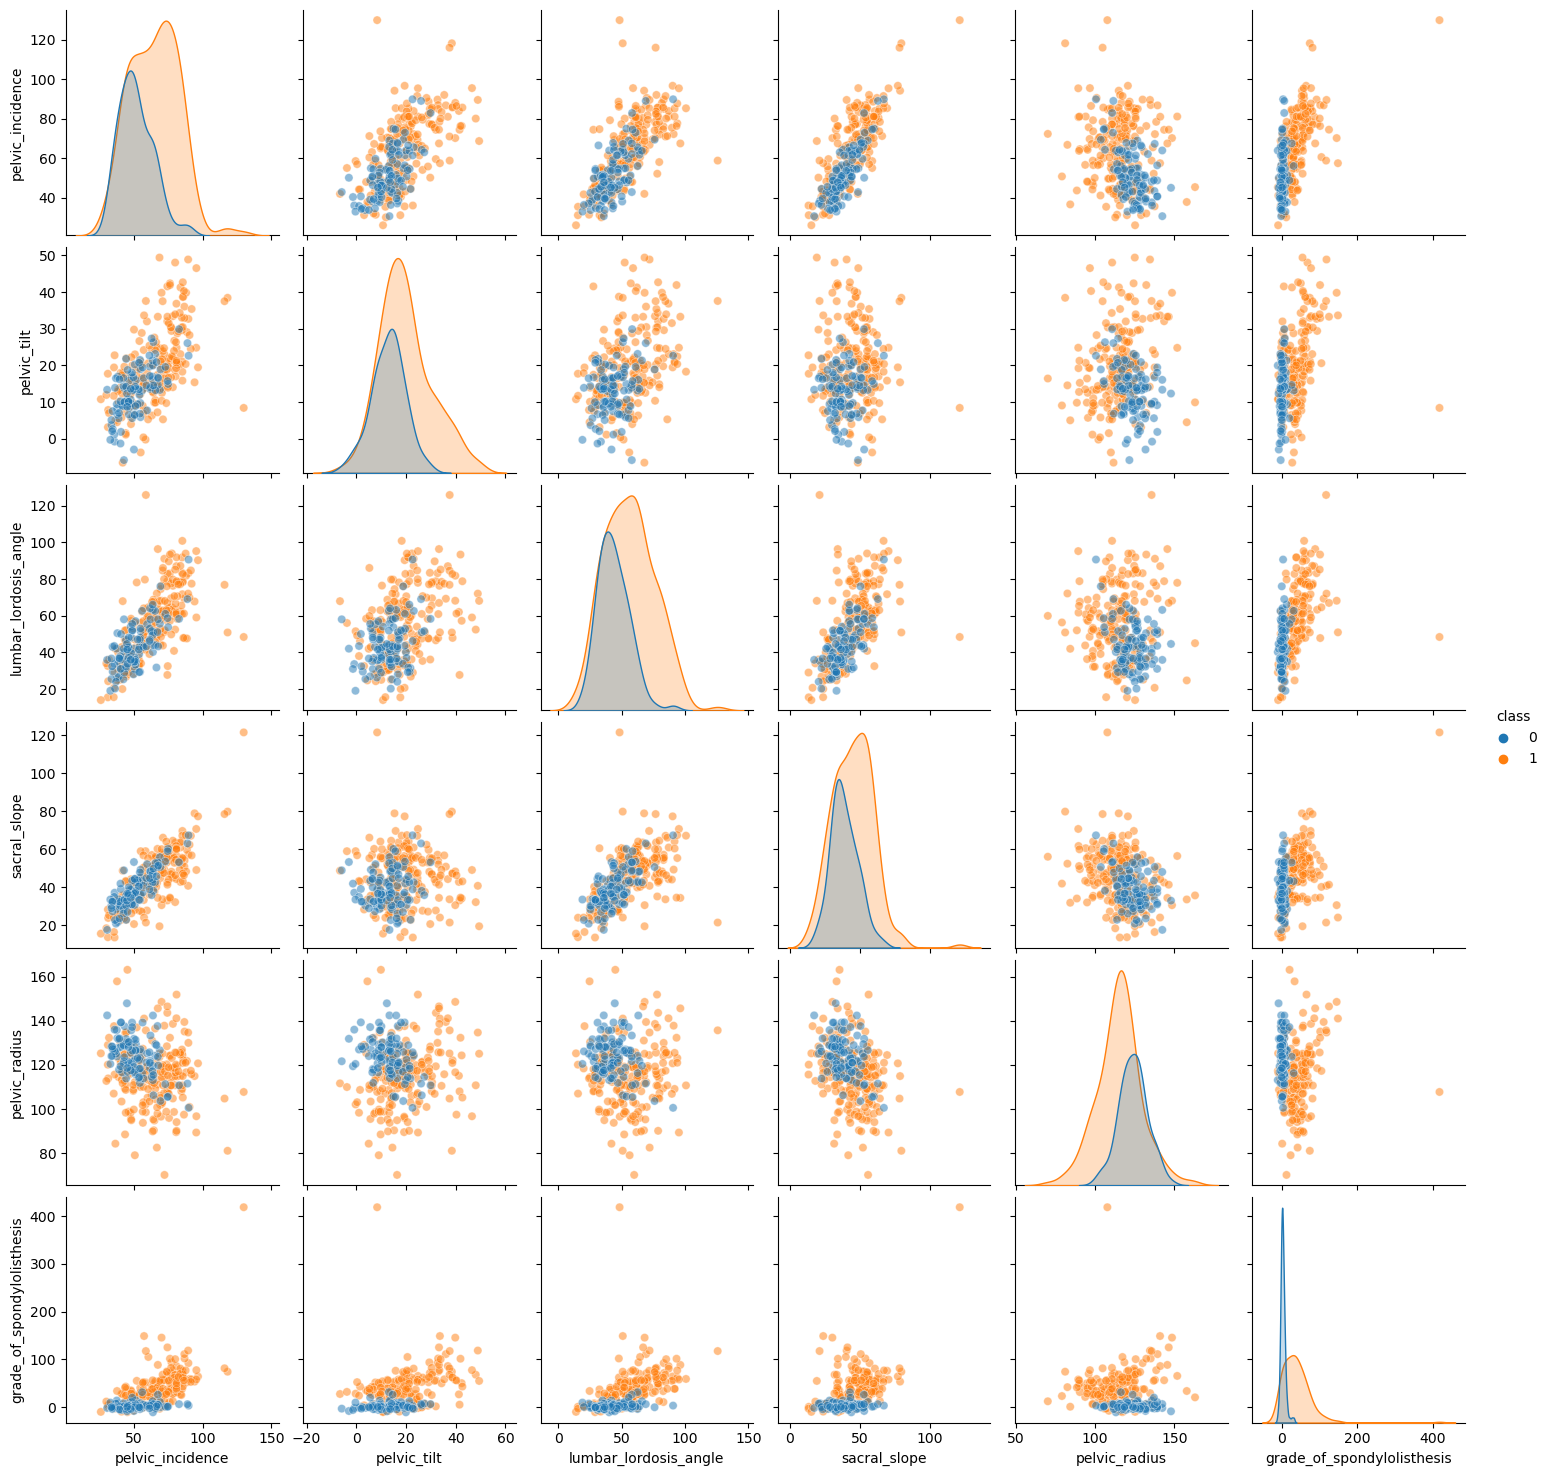

In [5]:
sns.pairplot(df,hue='class',plot_kws={'alpha' : 0.5})

# hue is used to differentiate the categorical data and visually see the difference between classes "AB=1" and "NO=0."
"""I didn't explicitly mention "vars=df.columns[:-1]" in the pairplot because when I use hue='class', 
it indirectly indicates to seaborn that 'class' is a categorical variable."""
# alpha is used to show the data points clearly when data overlap at a particular point.

plt.show()

####  boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

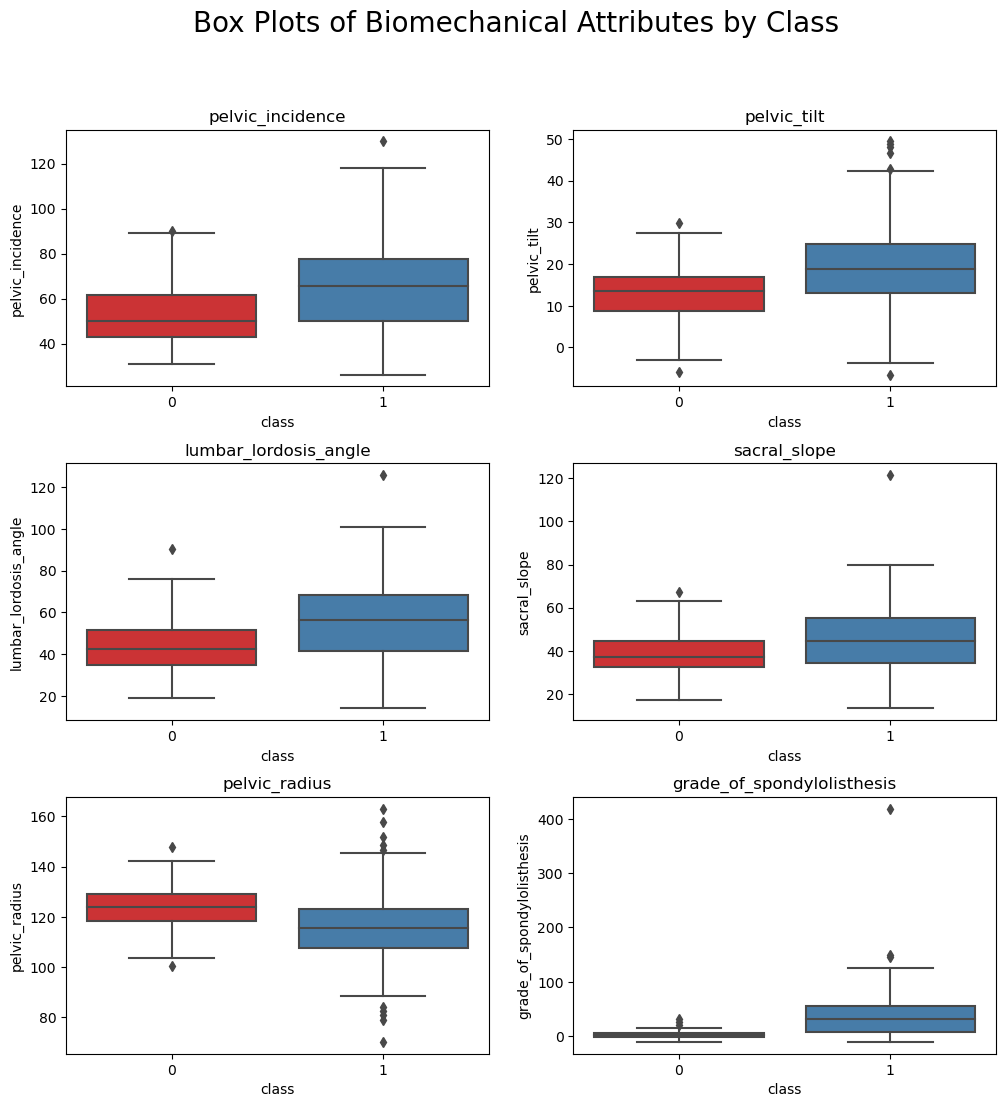

In [6]:
Independent_variables = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis']


plt.figure(figsize=(12, 12))
for index, var in enumerate(Independent_variables):
    plt.subplot(3, 2, index+1)
    sns.boxplot(x='class', y=var, data=df, palette='Set1')
    plt.title(f'{var}')

plt.suptitle('Box Plots of Biomechanical Attributes by Class', fontsize=20)
plt.subplots_adjust(wspace=0.2,hspace=0.3)


plt.show()

#### Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
class_0 = df[df['class'] == 0]
class_0_train = class_0[:70]
class_0_test = class_0[70:]

class_1 = df[df['class'] == 1]
class_1_train = class_1[:140]
class_1_test = class_1[140:]

train_data = pd.concat([class_0_train, class_1_train])
test_data = pd.concat([class_0_test, class_1_test])

# mannually assigning the train_data
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']
# mannually assigning the test_data
X_test = test_data.drop('class',axis=1)
y_test = test_data['class']

'''The np.ascontiguousarray function ensures an array is stored in contiguous memory, improving performance and 
compatibility by creating a contiguous copy if necessary.''' 

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

### (c) Classification using KNN on Vertebral Column Data Set
* i) Write code for k-nearest neighbors with Euclidean metric (or use a software package).
* ii) Test all the data in the test database with knearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ { 208, 205, . . . , 7, 4, 1,} (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*
* iii) Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the
best test error rate
,
3
which
is obtained by some value of
k
, against the size of training set, when the
size of training set is
N
∈ {
10
,
20
,
30
, . . . ,
210
}
.
4
Note: for each
N
, select
your training set by choosing the first
b
N/
3
c
rows of Class 0 and the first
N
− b
N/
3
c
rows of Class 1 in the training set you created in 1(b)iii. Also, for
each
N
, select the optimal
k
from a set starting from
k
= 1, increasing by 5.
For example, if
N
= 200, the optimal
k
is selected from
{
1
,
6
,
11
, . . . ,
196
}
.
This plot is called a
Learning Curve
.

#### code for k-nearest neighbors with Euclidean metric (or use a software package).

In [8]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

''' The fit method trains the KNN model on the training data X_train and the corresponding labels 
y_train. For KNN, "training" essentially means storing the dataset, as KNN is a lazy learner.'''
knn.fit(X_train, y_train)


'''Manual Computation: Allows for in-depth analysis beyond just the error rate, such as evaluating 
the model's performance using various metrics.

.score() Method:The score method internally predicts the labels for the given dataset 
(X_train or X_test) and then computes the accuracy by comparing the predicted labels to the
actual labels (y_train or y_test).Provides a quick and direct way to get the model's accuracy without 
additional details.'''

# This is required to calculate the accuracy manually and to do indepth analysis(i.e confusion matrix ect.) 
y_train_predict = knn.predict(X_train)
train_error = round(1 - accuracy_score(y_train, y_train_predict),4)
y_test_predict = knn.predict(X_test)
test_error = round(1 - accuracy_score(y_test, y_test_predict),4)
print(f"manually computed Train data error is {train_error}")
print(f"manually computed Test data error is {test_error}")

train_data_accuracy = knn.score(X_train,y_train)
train_data_error = round(1 - train_data_accuracy,4)
test_data_accuracy = knn.score(X_test, y_test)  
test_data_error = round(1 - test_data_accuracy,4)
print(f"Train data error using .score() method is {train_data_error}")
print(f"Test data error using .score() method is {test_data_error}")



manually computed Train data error is 0.1048
manually computed Test data error is 0.0808
Train data error using .score() method is 0.1048
Test data error using .score() method is 0.0808


* Test all the data in the test database with knearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ { 208, 205, . . . , 7, 4, 1,} (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*

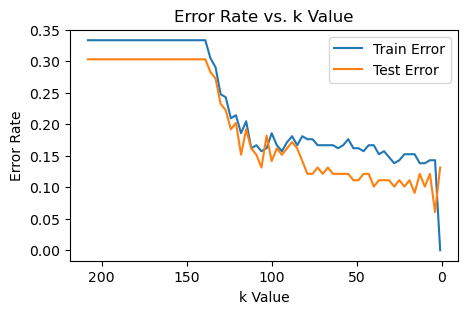

Best value of k / the most suitable k : 4

Confusion Matrix:


,Predicted Negative,Predicted Positive
Actual Negative,25,5
Actual Positive,1,68


True Positive Rate (TPR) / Sensitivity / Recall: 0.9855
True Negative Rate (TNR) / Specificity: 0.8333
Precision: 0.9315
F1 Score: 0.9577

Classification Report:


,precision,recall,f1-score,support
0,0.961538,0.833333,0.892857,30.000000
1,0.931507,0.985507,0.957746,69.000000
accuracy,0.939394,0.939394,0.939394,0.939394
macro avg,0.946523,0.909420,0.925302,99.000000
weighted avg,0.940607,0.939394,0.938083,99.000000



 Train and Test error for k values: 


,k,Train Error,Test Error,Train Error - Test Error
0,208,0.333333,0.303030,0.030303
1,205,0.333333,0.303030,0.030303
2,202,0.333333,0.303030,0.030303
3,199,0.333333,0.303030,0.030303
4,196,0.333333,0.303030,0.030303
...,...,...,...,...
65,13,0.138095,0.121212,0.016883
66,10,0.138095,0.101010,0.037085
67,7,0.142857,0.121212,0.021645
68,4,0.142857,0.060606,0.082251


In [9]:
# Creating an empty list to store the errors of train and test data
train_errors = []
test_errors = []
diff = []

k_values = range(208, 0, -3)

# Iterating over each value of K, train the model, and calculate errors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    
    # Calculation of current train and test error
    current_train_error = 1 - knn.score(X_train, y_train)
    current_test_error = 1 - knn.score(X_test, y_test)
    
    # Add the current errors to their respective lists
    train_errors.append(current_train_error)
    test_errors.append(current_test_error)
    
    # Calculation of the difference between the current test error and train error, then append it to diff
    current_diff = current_train_error - current_test_error 
    diff.append(current_diff)

# plotting the train and test errors in terms of k for k ∈ { 208, 205, . . . , 7, 4, 1,}
plt.figure(figsize=(5, 3))
plt.plot(list(k_values), train_errors, label='Train Error')
plt.plot(list(k_values), test_errors, label='Test Error')
plt.gca().invert_xaxis()  # To reverse the x-axis
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value')
plt.legend()
plt.show()
    
# Determine the best k value based on the minimum test error
best_k_value = k_values[test_errors.index(min(test_errors))]

# Train and predict with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k_value, metric="euclidean")
best_knn.fit(X_train, y_train)
# here we used knn.predict for detail analysis in above cells we used knn.score which directly gives accuracy.
best_y_predicted = best_knn.predict(X_test)

# Best value of k
print(f"Best value of k / the most suitable k : {best_k_value}")


"""A confusion matrix is used primarily to evaluate the performance of classification models in 
machine learning. It provides a detailed breakdown of correct and incorrect predictions made by 
the model, categorized by each class. This allows for a more nuanced understanding of the model's 
effectiveness than simpler metrics like accuracy, especially in cases where classes are imbalanced.
By analyzing the matrix, one can identify if the model is confusing two classes (misclassifying one
as another), which aspects of the model could be improved (precision, recall), and how well the model 
is recognizing each class. It serves as a foundational tool for diagnosing classification model 
performance and guiding subsequent improvements."""

"""
True Positive (TP): The model correctly predicts the positive class.
True Negative (TN): The model correctly predicts the negative class.
False Positive (FP): The model incorrectly predicts the positive class (also known as a Type I error).
False Negative (FN): The model incorrectly predicts the negative class (also known as a Type II error).

From these values, several metrics can be calculated:

Precision: The ratio of correctly predicted positive observations to the total predicted positives. 
It is given by TP / (TP + FP). It measures the quality of the positive class predictions.

Recall (Sensitivity or True Positive Rate): The ratio of correctly predicted positive observations 
to all observations in the actual class. It is given by TP / (TP + FN). It measures the ability of the
model to find all the positive samples.

F1 Score: The weighted average of Precision and Recall. It takes both false positives and false 
negatives into account. It is given by 2 * (Precision * Recall) / (Precision + Recall). F1 Score is a
measure of a test's accuracy.

Accuracy: The ratio of correctly predicted observations to the total observations. 
It is given by (TP + TN) / (TP + TN + FP + FN). However, it may not be a good measure if the classes 
are imbalanced.
"""

# Create and display the confusion matrix as a DataFrame
conf_matrix = confusion_matrix(y_test, best_y_predicted)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=["Actual Negative", "Actual Positive"], 
                              columns=["Predicted Negative", "Predicted Positive"])
print("\nConfusion Matrix:")
display(conf_matrix_df)


TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]


TPR = round(TP / (TP + FN),4)
TNR = round(TN / (TN + FP),4)
Recall = TPR
Precision = round(TP / (TP + FP),4)
F1_Score = round(2 * (Precision * Recall) / (Precision + Recall),4)


print(f"True Positive Rate (TPR) / Sensitivity / Recall: {TPR}")
print(f"True Negative Rate (TNR) / Specificity: {TNR}")
print(f"Precision: {Precision}")
print(f"F1 Score: {F1_Score}")



"""A classification report includes these metrics and provides a comprehensive overview of the 
performance of the model across all classes. It typically includes precision, recall, f1-score 
for each class, and sometimes support (the number of actual occurrences of the class in the specified 
dataset)."""

# Create and display the classification report as a DataFrame
report = classification_report(y_test, best_y_predicted, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
display(report_df)



# Create a DataFrame to display errors and their differences
errors_dict = {'k': list(k_values), 'Train Error': train_errors, 'Test Error': test_errors, 'Train Error - Test Error': diff}
errors_df = pd.DataFrame(errors_dict)
print("\n Train and Test error for k values: ")
display(errors_df)


* iii) Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the
best test error rate
,
3
which
is obtained by some value of
k
, against the size of training set, when the
size of training set is
N
∈ {
10
,
20
,
30
, . . . ,
210
}
.
4
Note: for each
N
, select
your training set by choosing the first
b
N/
3
c
rows of Class 0 and the first
N
− b
N/
3
c
rows of Class 1 in the training set you created in 1(b)iii. Also, for
each
N
, select the optimal
k
from a set starting from
k
= 1, increasing by 5.
For example, if
N
= 200, the optimal
k
is selected from
{
1
,
6
,
11
, . . . ,
196
}
.
This plot is called a
Learning Curve
.

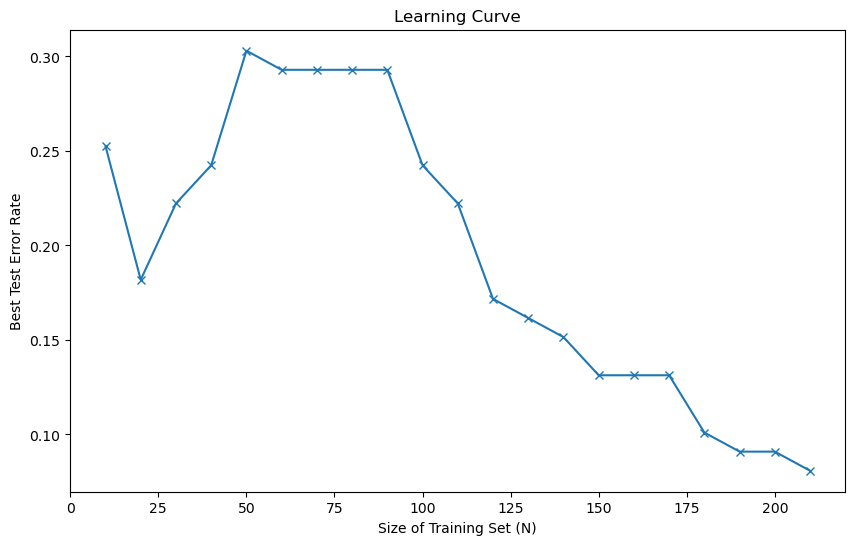

In [10]:
sizes = range(10, 211, 10)
best_test_errors = []

for N in sizes:
    # division of data according to the question
    N_class_0 = N // 3
    N_class_1 = N - N_class_0

    # combine the divded train and test data
    train_subset = pd.concat([class_0.iloc[:N_class_0], class_1.iloc[:N_class_1]])
    X_train_subset = train_subset.drop('class', axis=1)
    y_train_subset = train_subset['class']

    # storing data continous to increase efficency of the memory
    X_train_subset = np.ascontiguousarray(X_train_subset)
    y_train_subset = np.ascontiguousarray(y_train_subset)

    
    subset_test_errors = []
    for k in range(1, N, 5):
        knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        knn.fit(X_train_subset, y_train_subset)
        subset_test_errors.append(1 - knn.score(X_test, y_test))
                

    best_test_errors.append(min(subset_test_errors))

# plotting learning curve
plt.figure(figsize=(10, 6))
plt.plot(sizes, best_test_errors, marker='x')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.show()


### d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗ ) in a table. Use all of your training data and select the best k when { 1, 6 , 11 , . . . , 196 } .
#### i. Minkowski Distance:
* A.
which becomes Manhattan Distance with
p
= 1.
* B.
with log
10
(
p
)
∈ {
0
.
1
,
0
.
2
,
0
.
3
, . . . ,
1
}
. In this case, use the
k
∗
you found
for the Manhattan distance in 1(d)iA. What is the best log
10
(
p
)?
* C.
which becomes Chebyshev Distance with
p
→ ∞
#### ii. Mahalanobis Distance.


In [11]:
k_range = list(range(1, 197, 5))

# Manhattan Distance (p=1 in Minkowski)
manhattan_errors = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    manhattan_errors.append(1 - accuracy_score(y_test, y_pred))
    
    
# Best k value for Manhattan
best_k_manhattan = k_range[np.argmin(manhattan_errors)]


# Minkowski Distance for varying p values
log10_p_values = np.arange(0.1, 1.1, 0.1)
minkowski_errors = []
for log10_p in log10_p_values:
    p = 10 ** log10_p
    knn = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    minkowski_errors.append(1 - accuracy_score(y_test, y_pred))

# Best log10(p) for Minkowski
best_log10_p = log10_p_values[np.argmin(minkowski_errors)]


# Chebyshev Distance (p→∞ in Minkowski)
chebyshev_errors = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    chebyshev_errors.append(1 - accuracy_score(y_test, y_pred))

# Best k value for Chebyshev Distance
best_k_index = np.argmin(chebyshev_errors)
best_k_chebyshev = k_range[best_k_index]


# Mahalanobis Distance
# Note: Mahalanobis requires the inverse of the covariance matrix of X_train
V = np.cov(X_train.T)
VI = np.linalg.inv(V)
mahalanobis_errors = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': VI})
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mahalanobis_errors.append(1 - accuracy_score(y_test, y_pred))

# Best k value for mahalanobis
best_k_mahalanobis = k_range[np.argmin(mahalanobis_errors)]



# Create a dictionary with the metric names, best k values, and corresponding test errors
results = {
    'Metric': ['Manhattan', 'Minkowski', 'Chebyshev', 'Mahalanobis'],
    'Best k': [best_k_manhattan, None , best_k_chebyshev, best_k_mahalanobis],
    'Best log10(p) for Minkowski': [None, best_log10_p, None, None],  # Only relevant for Minkowski
    'Test Error for Best k': [min(manhattan_errors), min(minkowski_errors), min(chebyshev_errors), min(mahalanobis_errors)]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)


,Metric,Best k,Best log10(p) for Minkowski,Test Error for Best k
0,Manhattan,6.0,NaN,0.111111
1,Minkowski,NaN,0.6,0.060606
2,Chebyshev,16.0,NaN,0.080808
3,Mahalanobis,1.0,NaN,0.161616


* e)
The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is
inversely proportional
to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when
k
∈ {
1
,
6
,
11
,
16
, . . . ,
196
}
.

In [12]:
k_range = range(1, 200, 5)

# Creating Empty lists to store the errors for each metric
weighted_euclidean_errors = []
weighted_manhattan_errors = []
weighted_chebyshev_errors = []



for metric in ['euclidean', 'manhattan', 'chebyshev']:
    errors = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
    
    # minimum error and corresponding k values
    min_error = min(errors)
    best_ks = [k for k, error in zip(k_range, errors) if error == min_error]
    
    # Print best k values and the minimum test error for the current metric
    print(f"Metric: {metric}")
    print(f"Best k values: {best_ks}")
    print(f"Minimum Test Error: {min_error}\n")

    
    if metric == 'euclidean':
        weighted_euclidean_errors = errors
        best_k_weighted_euclidean = best_ks[0]
    elif metric == 'manhattan':
        weighted_manhattan_errors = errors
        best_k_weighted_manhattan = best_ks[0]
    elif metric == 'chebyshev':
        weighted_chebyshev_errors = errors
        best_k_weighted_chebyshev = best_ks[0]

# Creating a summary DataFrame
summary_data = {
    'Metric': ['Weighted Euclidean', 'Weighted Manhattan', 'Weighted Chebyshev'],
    'Best k': [best_k_weighted_euclidean, best_k_weighted_manhattan, best_k_weighted_chebyshev],
    'Best Test Error Rate': [
        min(weighted_euclidean_errors),
        min(weighted_manhattan_errors),
        min(weighted_chebyshev_errors)
    ]
}
summary_df = pd.DataFrame(summary_data)

# Displaying the summary DataFrame
display(summary_df)


Metric: euclidean
Best k values: [6]
Minimum Test Error: 0.101010101010101

Metric: manhattan
Best k values: [6, 26]
Minimum Test Error: 0.101010101010101

Metric: chebyshev
Best k values: [16, 31, 36, 41, 61]
Minimum Test Error: 0.11111111111111116



,Metric,Best k,Best Test Error Rate
0,Weighted Euclidean,6,0.101010
1,Weighted Manhattan,6,0.101010
2,Weighted Chebyshev,16,0.111111


* f) What is the lowest training error rate you achieved in this homework?

##### The lowest training error rate observed in this homework is 0.0, which typically occurs when the value of k is set to 1. In such a case, the model uses only the nearest neighbor for predictions, which means each data point effectively predicts itself, leading to a perfect match and, consequently, a zero error rate during training.







In [13]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### References
* https://seaborn.pydata.org/
* https://numpy.org/
* https://pandas.pydata.org/
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://seaborn.pydata.org/generated/seaborn.boxplot.html
* https://matplotlib.org/stable/tutorials/introductory/pyplot.html
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* 
https://scikitlearn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix